Comparison of QR DMD to Zhang et al. Online Dynamic Mode Decomposition for Time-Varying Systems

- https://epubs.siam.org/doi/abs/10.1137/18M1192329?journalCode=sjaday

using their data & code

https://github.com/haozhg/odmd

In [75]:
%run fDMD_functions.ipynb

from scipy.integrate import odeint
from odmd import OnlineDMD
import time
import matplotlib.pyplot as plt

Njihovo

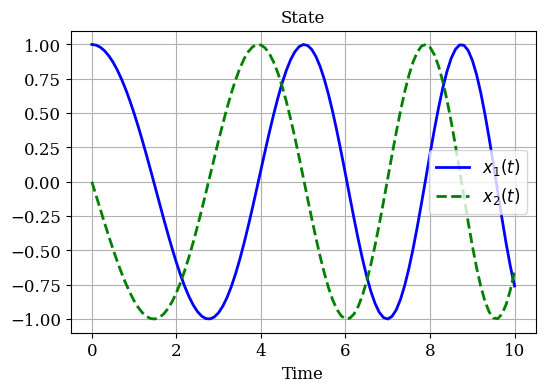

In [76]:
## prepisano iz njihovog

# define dynamics
epsilon = 1e-1
def dyn(x, t):
    x1, x2 = x
    dxdt = [(1+epsilon*t)*x2, -(1+epsilon*t)*x1]
    return dxdt

# integrate from initial condition [1,0]
tspan = np.linspace(0, 10, 101)
dt = 0.1
x0 = [1, 0]
xsol = odeint(dyn, x0, tspan).T
# extract snapshots
x, y = xsol[:, :-1], xsol[:, 1:]
t = tspan[1:]
# true dynamics, true eigenvalues
n, m = len(x[:, 0]), len(x[0, :])
A = np.empty((n, n, m))
evals = np.empty((n, m), dtype=complex)
for k in range(m):
    A[:, :, k] = np.array([[0, (1+epsilon*t[k])], [-(1+epsilon*t[k]), 0]])
    evals[:, k] = np.linalg.eigvals(A[:, :, k])

# visualize snapshots
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(6,4))
plt.rc('text', usetex=False) #samo sam tu stavila da ne koristim tex..
plt.rc('font', family='serif')
plt.plot(tspan, xsol[0, :], 'b-', linewidth=2.0,  label='$x_1(t)$')
plt.plot(tspan, xsol[1, :], 'g--', linewidth=2.0,  label='$x_2(t)$')
plt.legend(loc='best', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.title('State', fontsize=12)
plt.tick_params(labelsize=12)
plt.grid()
plt.show()


#####################################################################################################################################
#   u x i u y su spremljeni podaci. evals su prave sv vrijednosti od A

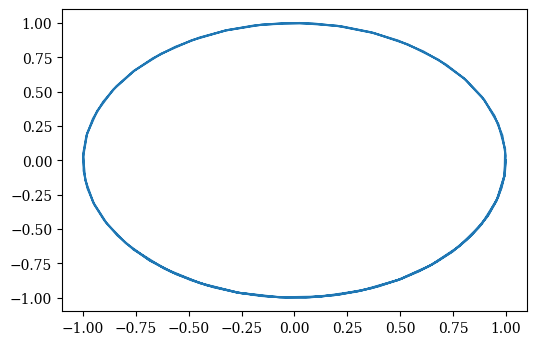

In [77]:
#rjesenja su na jedinicnoj kruznici
plt.plot(xsol[0,:], xsol[1,:])

In [78]:
q = 10 #toliko uzmem za pocetak
evalsonlineDMD1 = np.empty((n, m), dtype=complex)
odmd = OnlineDMD(n, 1.0)
odmd.initialize(x[:, :q], y[:, :q])
start = time.time()
for k in range(q, m):
    odmd.update(x[:, k], y[:, k])
    evalsonlineDMD1[:, k] = np.log(np.linalg.eigvals(odmd.A))/dt
end = time.time()
print("Online DMD, weighting = 1, time = " + str(end-start) + " secs")

Online DMD, weighting = 1, time = 0.007185697555541992 secs


In [79]:
Lambda, Z = odmd.computemodes()

In [80]:
Lambda
Z

array([[ 0.71+0.j ,  0.71-0.j ],
       [-0.01+0.7j, -0.01-0.7j]])

Nase

In [81]:
Z_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(x[:,:q], y[:,:q])
start_nas = time.time()
for k in range(q, m):
    Z_nas, Lambda_nas, r, Q, L = fDMD_added_snap(np.bmat([x[:,k],y[:,k]]).T, Q, L)
end_nas = time.time()
print("time: ", end_nas-start_nas, "sec")

time:  0.046835899353027344 sec


In [82]:
np.allclose(Q.T@Q, np.eye(4,4))

True

In [83]:
print("Our eigs", Lambda_nas, sep="\n")
print("Zhang eigs", Lambda, sep="\n")
print("Our modes", Z_nas, sep="\n")
print("Zhang modes", Z, sep="\n")

## razliciti modovi - radimo istu stvar..

Our eigs
[0.99+0.15j 0.99-0.15j]
Zhang eigs
[0.99+0.15j 0.99-0.15j]
Our modes
[[-0.5 -0.51j -0.5 +0.51j]
 [ 0.51-0.48j  0.51+0.48j]]
Zhang modes
[[ 0.71+0.j   0.71-0.j ]
 [-0.01+0.7j -0.01-0.7j]]


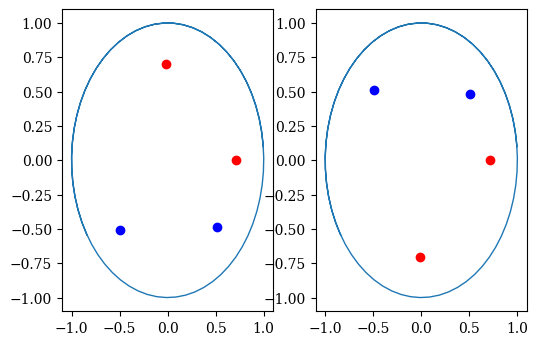

In [84]:
plt.subplot(1, 2, 1)
plt.plot(np.real(Z[:,0]), np.imag(Z[:,0]), 'o', label="zhang", color="r")
plt.plot(np.real(Z_nas[:,0]), np.imag(Z_nas[:,0]),'o', label="mi", color="b")
plt.plot(np.cos(t), np.sin(t), linewidth=1)


plt.subplot(1, 2, 2)
plt.plot(np.real(Z[:,1]), np.imag(Z[:,1]), 'o', label="zhang", color="r")
plt.plot(np.real(Z_nas[:,1]), np.imag(Z_nas[:,1]), 'o', label="mi", color="b")
plt.plot(np.cos(t), np.sin(t), linewidth=1)


plt.show()

In [85]:
#koje modove dobijem ako odmah ubacim sve x i y?
start_nas_sve=time.time()
Z_nas_svi, Lambda_nas_svi, r, Q, L = fGEDMDQ_multiple_trajectories(x, y)
end_nas_sve=time.time()
print("time: ", end_nas_sve-start_nas_sve, "sec")

time:  0.0 sec


In [86]:
print("Our batch modes", Z_nas_svi, sep="\n")
print("Our batch eigs", Lambda_nas_svi, sep="\n")

Our batch modes
[[-0.5 -0.51j -0.5 +0.51j]
 [ 0.51-0.48j  0.51+0.48j]]
Our batch eigs
[0.99+0.15j 0.99-0.15j]


In [87]:
indices=np.array([0,1]); times=[i for i in range(m)]
reconstructed=DMD_reconstruction(x, Z_nas, indices, Lambda_nas, times)

In [88]:
#nas reconstruction za njihov dmd..
reconstructed_njihovo = DMD_reconstruction(x, Z, indices, Lambda, times)

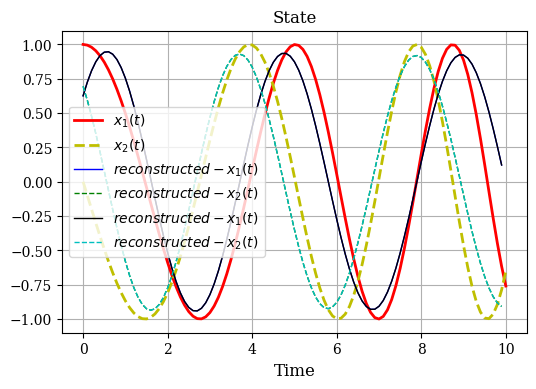

In [89]:
# visualize snapshots
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(6,4))
plt.rc('text', usetex=False) #samo sam tu stavila da ne koristim tex..
plt.rc('font', family='serif')
plt.plot(tspan, xsol[0, :], 'r-', linewidth=2.0,  label='$x_1(t)$')
plt.plot(tspan, xsol[1, :], 'y--', linewidth=2.0,  label='$x_2(t)$')
plt.plot(tspan[:-1], reconstructed[0, :], 'b-', linewidth=1.0,  label='$reconstructed - x_1(t)$')
plt.plot(tspan[:-1], reconstructed[1, :], 'g--', linewidth=1.0,  label='$reconstructed - x_2(t)$')
plt.plot(tspan[:-1], reconstructed_njihovo[0, :], 'k-', linewidth=1.0,  label='$reconstructed - x_1(t)$')
plt.plot(tspan[:-1], reconstructed_njihovo[1, :], 'c--', linewidth=1.0,  label='$reconstructed - x_2(t)$')
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=12)
plt.title('State', fontsize=12)
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

#nase i njihove predikcije se preklapaju

In [90]:
num_stack = 10
#num_stack=30
x_stacked = x[:,:(m-num_stack+1)]
y_stacked = y[:,:(m-num_stack+1)]

for i in range(1,num_stack):
    x_stacked=np.vstack((x_stacked,x[:,i:(m-num_stack+1+i)]))
    y_stacked=np.vstack((y_stacked,y[:,i:(m-num_stack+1+i)]))

(n,m)=x_stacked.shape

In [91]:
#je li dobro formirano..

print(x_stacked.shape, y_stacked.shape)

k=np.random.randint(num_stack, m-num_stack)
for i in range(1,num_stack):
    if(np.all(x[:2,k]==x_stacked[2*i:2*i+2,k-i]) and np.all(y[:2,k]==y_stacked[2*i:2*i+2,k-i])):
        print(True, end=" ")
    else:
        print(False, x[:2,k],x_stacked[2*i:2*i+2,k-i])

(20, 91) (20, 91)
True True True True True True True True True 

In [92]:
q = 41 #toliko uzmem za pocetak
evalsonlineDMD1 = np.empty((n, m), dtype=complex)
odmd = OnlineDMD(n, 1.0)
odmd.initialize(x_stacked[:, :q], y_stacked[:, :q])
start = time.time()
for k in range(q, m):
    odmd.update(x_stacked[:, k], y_stacked[:, k])
    evalsonlineDMD1[:, k] = np.log(np.linalg.eigvals(odmd.A))/dt
end = time.time()
print("Online DMD, weighting = 1, time = " + str(end-start) + " secs")

Lambda, Z = odmd.computemodes()

print(Lambda); print(Z)

Online DMD, weighting = 1, time = 0.009325265884399414 secs
[-0.8 +0.j   -0.77+0.39j -0.77-0.39j -0.55+0.51j -0.55-0.51j -0.29+0.77j
 -0.29-0.77j  0.38+1.04j  0.38-1.04j  0.1 +0.j    1.03+0.23j  1.03-0.23j
  1.01+0.19j  1.01-0.19j  0.99+0.15j  0.99-0.15j  0.97+0.11j  0.97-0.11j
  0.94+0.08j  0.94-0.08j]
[[ 3.09e-01+0.j   -4.06e-01-0.19j -4.06e-01+0.19j  3.17e-01+0.22j
   3.17e-01-0.22j  4.61e-02-0.39j  4.61e-02+0.39j -4.75e-02-0.15j
  -4.75e-02+0.15j  3.75e-01+0.j   -1.53e-01+0.07j -1.53e-01-0.07j
  -1.65e-02-0.2j  -1.65e-02+0.2j  -2.18e-01-0.05j -2.18e-01+0.05j
   2.51e-01+0.j    2.51e-01-0.j    5.28e-04-0.28j  5.28e-04+0.28j]
 [-5.38e-01+0.j    9.36e-02-0.04j  9.36e-02+0.04j -5.16e-01+0.j
  -5.16e-01-0.j    4.05e-01+0.j    4.05e-01-0.j    2.04e-01+0.13j
   2.04e-01-0.13j  9.22e-01+0.j   -6.87e-02-0.15j -6.87e-02+0.15j
   1.96e-01-0.02j  1.96e-01+0.02j  4.85e-02-0.22j  4.85e-02+0.22j
  -6.07e-06+0.25j -6.07e-06-0.25j  2.82e-01+0.j    2.82e-01-0.j  ]
 [-2.70e-01+0.j    4.71e-01+0.j    

In [108]:
Z_nas, Lambda_nas, r, Q, L = fGEDMDQ_multiple_trajectories(x_stacked[:,:q], y_stacked[:,:q]) #isti rez ako dodam tol 1e-6, 
                                                                                                    #ako stavim tol = 1e-3 malo losiji rez
start_nas = time.time()
for k in range(q, m):
    Z_nas, Lambda_nas, r, Q, L = fDMD_added_snap(np.bmat([x_stacked[:,k],y_stacked[:,k]]).T, Q, L)
end_nas = time.time()
print("time: ", end_nas-start_nas, "sec")

print("Our eigs", Lambda_nas, sep="\n")
print("Zhang eigs", Lambda, sep="\n")
print("Our modes", Z_nas, sep="\n")
print("Zhang modes", Z, sep="\n")

## razliciti modovi - radimo istu stvar..

time:  0.05566692352294922 sec
Our eigs
[-0.76+0.34j -0.76-0.34j -0.75+0.12j -0.75-0.12j -0.4 +0.7j  -0.4 -0.7j
 -0.13+0.74j -0.13-0.74j  0.56+0.j    1.04+0.24j  1.04-0.24j  1.02+0.19j
  1.02-0.19j  1.  +0.16j  1.  -0.16j  0.98+0.12j  0.98-0.12j  0.95+0.08j
  0.95-0.08j  0.97+0.j  ]
Zhang eigs
[-0.8 +0.j   -0.77+0.39j -0.77-0.39j -0.55+0.51j -0.55-0.51j -0.29+0.77j
 -0.29-0.77j  0.38+1.04j  0.38-1.04j  0.1 +0.j    1.03+0.23j  1.03-0.23j
  1.01+0.19j  1.01-0.19j  0.99+0.15j  0.99-0.15j  0.97+0.11j  0.97-0.11j
  0.94+0.08j  0.94-0.08j]
Our modes
[[-4.33e-01-3.62e-01j -4.33e-01+3.62e-01j  2.03e-01-3.10e-01j
   2.03e-01+3.10e-01j  1.59e-01+4.53e-01j  1.59e-01-4.53e-01j
   4.15e-01+4.21e-02j  4.15e-01-4.21e-02j -3.38e-01+0.00e+00j
   1.12e-01+1.14e-01j  1.12e-01-1.14e-01j -1.73e-01+7.34e-02j
  -1.73e-01-7.34e-02j -2.07e-01+5.65e-02j -2.07e-01-5.65e-02j
   2.39e-01-3.30e-02j  2.39e-01+3.30e-02j -2.71e-01-1.09e-04j
  -2.71e-01+1.09e-04j -3.38e-01+0.00e+00j]
 [-4.31e-02+4.02e-02j -4.31e-02-4.0

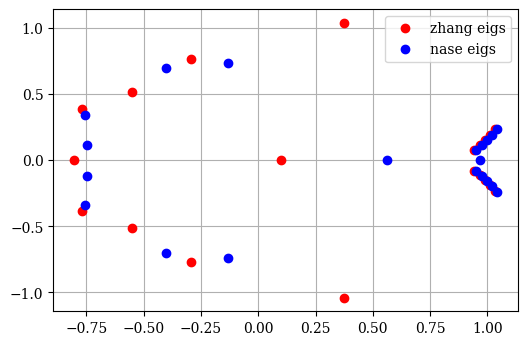

In [109]:
plt.plot(np.real(Lambda), np.imag(Lambda), 'o', color="r", label="zhang eigs")
plt.plot(np.real(Lambda_nas), np.imag(Lambda_nas), 'o', color="b", label="nase eigs")
plt.grid()
plt.legend()
plt.show()

In [110]:
indices=np.array([i for i in range (Z_nas.shape[1])]); times=[i for i in range(m)]
reconstructed=DMD_reconstruction(x_stacked, Z_nas, indices, Lambda_nas, times)

indices=np.array([i for i in range (Z.shape[1])]); times=[i for i in range(m)]
reconstructed_njihovo = DMD_reconstruction(x_stacked, Z, indices, Lambda, times)

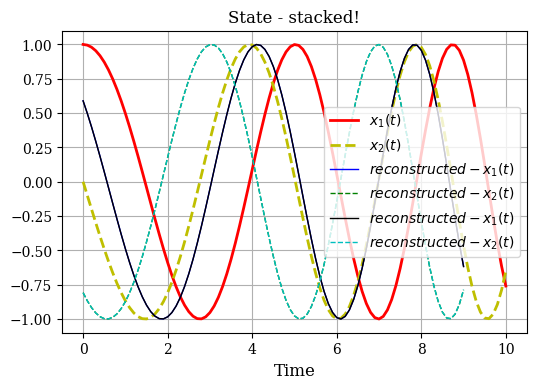

In [111]:
# visualize snapshots
plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(6,4))
plt.rc('text', usetex=False) #samo sam tu stavila da ne koristim tex..
plt.rc('font', family='serif')
plt.plot(tspan, xsol[0, :], 'r-', linewidth=2.0,  label='$x_1(t)$')
plt.plot(tspan, xsol[1, :], 'y--', linewidth=2.0,  label='$x_2(t)$')
plt.plot(tspan[:-10], reconstructed[-2, :], 'b-', linewidth=1.0,  label='$reconstructed - x_1(t)$')
plt.plot(tspan[:-10], reconstructed[-1, :], 'g--', linewidth=1.0,  label='$reconstructed - x_2(t)$')
plt.plot(tspan[:-10], reconstructed_njihovo[-2, :], 'k-', linewidth=1.0,  label='$reconstructed - x_1(t)$')
plt.plot(tspan[:-10], reconstructed_njihovo[-1, :], 'c--', linewidth=1.0,  label='$reconstructed - x_2(t)$')
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=12)
plt.title('State - stacked!', fontsize=12)
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

#nase i njihove predikcije se preklapaju 

###BOLJI REZULTATI BEZ STACKED!